In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [3]:
Model_1 = LinearRegression()

# 2. Setup Pipeline

In [4]:
pca=PCA()
SLR = Model_1

In [5]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("pca",pca),("SLR",SLR)])

In [6]:
param_grid = {
    "pca__n_components": [5, 10, 30, 45, 60, 100 ,150 ,170]
}

# 3. Setup GridSearch

In [7]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [8]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('SLR', LinearRegression())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [5, 10, 30, 45, 60, 100, 150,
                                               170]},
             scoring='neg_mean_squared_error')

In [9]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.787):
{'pca__n_components': 100}


In [10]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
5,0.175347,0.016974,0.010935,0.007158,100,{'pca__n_components': 100},-0.731785,-0.725812,-8.863826e-01,-0.837572,-9.487115e-01,-7.210656e-01,-0.663814,-7.510180e-01,-0.810393,-7.916711e-01,-7.868225e-01,8.170883e-02,1
4,0.120858,0.023273,0.007468,0.007366,60,{'pca__n_components': 60},-0.794639,-0.738161,-9.183312e-01,-0.853792,-9.587091e-01,-7.173497e-01,-0.715555,-8.222126e-01,-0.853671,-9.215312e-01,-8.293953e-01,8.330809e-02,2
3,0.098414,0.010003,0.012497,0.006248,45,{'pca__n_components': 45},-0.787329,-0.787636,-1.022724e+00,-0.852235,-9.794217e-01,-7.192462e-01,-0.730417,-8.252575e-01,-0.887958,-9.897259e-01,-8.581950e-01,1.032991e-01,3
2,0.085916,0.018811,0.010935,0.007158,30,{'pca__n_components': 30},-0.931427,-0.902475,-1.093786e+00,-0.998215,-1.104840e+00,-8.256840e-01,-0.808321,-9.410623e-01,-0.989541,-1.009325e+00,-9.604677e-01,9.443134e-02,4
1,0.070296,0.007811,0.009372,0.007652,10,{'pca__n_components': 10},-0.956875,-0.996122,-1.111667e+00,-1.032912,-1.165847e+00,-7.861707e-01,-0.846938,-9.273877e-01,-0.984467,-9.947860e-01,-9.803173e-01,1.066539e-01,5
0,0.062499,0.009886,0.007810,0.007810,5,{'pca__n_components': 5},-1.154878,-1.121821,-1.243400e+00,-1.459703,-1.452956e+00,-9.683643e-01,-1.186426,-1.118301e+00,-1.204526,-1.114914e+00,-1.202529e+00,1.446285e-01,6
6,0.104663,0.014060,0.006249,0.007653,150,{'pca__n_components': 150},-0.535833,-0.554218,-1.481674e+22,-0.631670,-1.037960e+23,-5.823736e+23,-0.566493,-3.467720e+23,-0.666246,-4.128813e+23,-1.460640e+23,2.067673e+23,7
7,0.101537,0.012595,0.009373,0.007653,170,{'pca__n_components': 170},-0.525045,-0.566361,-3.021293e+24,-0.649931,-5.397617e+22,-7.668862e+24,-0.575569,-1.778556e+25,-0.678793,-6.527168e+25,-9.380137e+24,1.940307e+25,8


# 4. Best Hyperparameter

In [11]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'pca__n_components': 100}


# 5. Evaluate Model $log(Sales)$

In [12]:
best_pca =parms.iloc[0][0]['pca__n_components']

In [13]:
Model_2 = LinearRegression()

In [14]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [15]:
pca1 = PCA(n_components=best_pca)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
SLR1 = Model_2
SLR1.fit(PX_train1,Y_train1)

LinearRegression()

In [16]:
pca2 = PCA(n_components=best_pca)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [17]:
MSE(SLR1.predict(PX_test1),Y_test1)

2.141436461758464

In [18]:
result = pd.DataFrame(np.exp(Y_test1))

In [19]:
result["Predicted_sales"] = np.exp(SLR1.predict(PX_test1))

In [20]:
MSE(result["sales"],result["Predicted_sales"])

1261.6348169722544

# 5.1 Model using original sales data

In [21]:
Model_3 = LinearRegression()

In [22]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [23]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [24]:
pca3 = PCA(n_components=best_pca)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
SLR2 = Model_3
SLR2.fit(PX_train2,Y_train2)

LinearRegression()

In [25]:
pca4 = PCA(n_components=best_pca)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [26]:
MSE(SLR2.predict(PX_test2),Y_test2)

1890.120318686849

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [27]:
residual = result['sales']-result['Predicted_sales']

In [28]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [29]:
import scipy.stats as sct

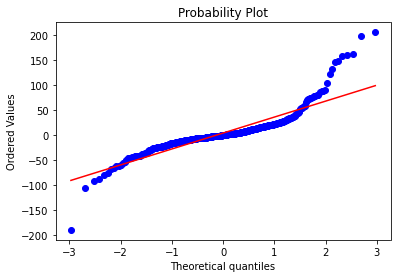

In [30]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [31]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

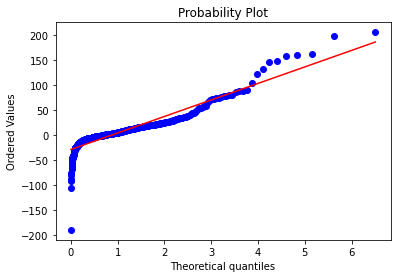

In [32]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [33]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

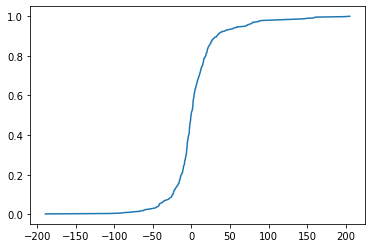

In [34]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

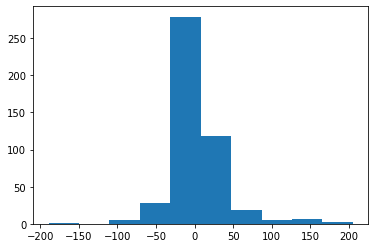

In [35]:
plt.hist(Sample)
plt.show()

In [36]:
def inv(sample,jump,area):
    size = len(sample)
    temp=0
    i=0
    while temp<area:
        temp=jump[i]
        i+=1
    return sample[i]

In [37]:
offset = inv(Sample,jumps,2/3)
offset

7.6094364776477565

In [38]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [39]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [40]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [41]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

21040.0

In [42]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

20564.0

In [43]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

23416.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [44]:
Model_4=LinearRegression()

In [45]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    SLR_K = Model_4
    SLR_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(SLR_K.predict(PX_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(SLR_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [46]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.087183,0.228832,-0.114740,0.227210,0.091217,0.145257,-0.030142,0.212576,0.227273,0.031406,0.110607
Exponential,0.057027,0.207619,-0.185761,0.204120,0.081628,0.109916,-0.076376,0.174588,0.200072,0.016135,0.078897
Empirical,0.115794,0.256143,-0.104026,0.247983,0.117889,0.180086,-0.010946,0.224545,0.246510,0.066942,0.134092


In [47]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,3608.0,10356.0,-5312.0,10588.0,4528.0,5672.0,-1476.0,9804.0,10160.0,1308.0,4923.6,5235.235834
Exponential,2360.0,9396.0,-8600.0,9512.0,4052.0,4292.0,-3740.0,8052.0,8944.0,672.0,3494.0,5747.357584
Empirical,4792.0,11592.0,-4816.0,11556.0,5852.0,7032.0,-536.0,10356.0,11020.0,2788.0,5963.6,5280.812195
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [48]:
profit_table.to_csv(".\\Model_Selection_Result\\2.1_Lin_reg.csv")